In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('traffic.csv')

# Inspect the first few rows to verify column names and structure
print(df.head())
print("Data shape:", df.shape)


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
Data shape: (48120, 4)


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('traffic.csv')

# Inspect the first few rows to verify column names and structure
print(df.head())
print("Data shape:", df.shape)


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
Data shape: (48120, 4)


In [3]:
# Assuming that the dataset has a column named 'junction'.
# If the column name is different (e.g., 'Junction'), adjust accordingly.
df_junction1 = df[df['Junction'] == 1].reset_index(drop=True)
print("Filtered data shape (junction 1 only):", df_junction1.shape)


Filtered data shape (junction 1 only): (14592, 4)


In [4]:
import numpy as np

# Load the indices from the saved text files
train_idx = np.loadtxt("train_order_idx.txt", dtype=int)
val_idx   = np.loadtxt("val_order_idx.txt", dtype=int)
test_idx  = np.loadtxt("test_order_idx.txt", dtype=int)

# Re-create the training, validation, and test DataFrames from df_junction1
train_data = df_junction1.iloc[train_idx].reset_index(drop=True)
val_data   = df_junction1.iloc[val_idx].reset_index(drop=True)
test_data  = df_junction1.iloc[test_idx].reset_index(drop=True)

print("Train, Val, and Test sets created:")
print(" - Train data shape:", train_data.shape)
print(" - Validation data shape:", val_data.shape)
print(" - Test data shape:", test_data.shape)


Train, Val, and Test sets created:
 - Train data shape: (10214, 4)
 - Validation data shape: (1459, 4)
 - Test data shape: (2919, 4)


In [5]:
import pandas as pd

# Convert the DateTime column to datetime, if not already done
for d in [train_data, val_data, test_data]:
    d['DateTime'] = pd.to_datetime(d['DateTime'])

# Define the target column and feature columns
target_col = 'Vehicles'
# Remove target and DateTime columns from features list
feature_cols = [col for col in train_data.columns if col not in [target_col, 'DateTime']]

# Separate features and target for each split
X_train = train_data[feature_cols]
y_train = train_data[target_col]

X_val = val_data[feature_cols]
y_val = val_data[target_col]

X_test = test_data[feature_cols]
y_test = test_data[target_col]

# No scaling at this stage - we'll handle specific scaling later
print("Features and targets separated without scaling.")

Features and targets separated without scaling.


Torch version: 2.5.1+cu121
CUDA available: True
CUDA version: 12.1
Device name: NVIDIA GeForce GTX 1050 Ti
Extracting lag and temporal features...
Creating lag features up to 168 hours...
Creating lag features up to 168 hours...


C:\Users\PLN\AppData\Local\Temp\ipykernel_13412\1264136632.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_feat[f'lag_{lag}'] = df_feat[target_col].shift(lag)
C:\Users\PLN\AppData\Local\Temp\ipykernel_13412\1264136632.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_feat[f'lag_{lag}'] = df_feat[target_col].shift(lag)
C:\Users\PLN\AppData\Local\Temp\ipykernel_13412\1264136632.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

Creating lag features up to 168 hours...
Shapes after feature engineering & NaN drop:
Train: (10046, 187), Val: (1291, 187), Test: (2751, 187)
Scaling features...
LSTM Input Shape (Train): torch.Size([10023, 168, 1])
LSTM Target Shape (Train): torch.Size([10023, 24])
Temporal Features Shape (Train): torch.Size([10046, 12])

LSTM Model Architecture:
LagLSTMModel(
  (lstm): LSTM(1, 256, num_layers=2, batch_first=True, dropout=0.05, bidirectional=True)
  (attention_fc1): Linear(in_features=512, out_features=64, bias=True)
  (attention_fc2): Linear(in_features=64, out_features=1, bias=True)
  (layer_norm_lstm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (layer_norm_context): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
  (fc): Linear(in_features=512, out_features=24, bias=True)
  (dropout): Dropout(p=0.05, inplace=False)
)

--- Training LSTM Model ---
Epoch 1/120, LSTM Train Loss: 0.552395, LSTM Val Loss: 0.637490
  -> New best validation loss: 0.637490. Saving model.

C:\Users\PLN\AppData\Local\Temp\ipykernel_13412\1264136632.py:282: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  lstm_model.load_state_dict(torch.load("best_lag_lstm_24_mode

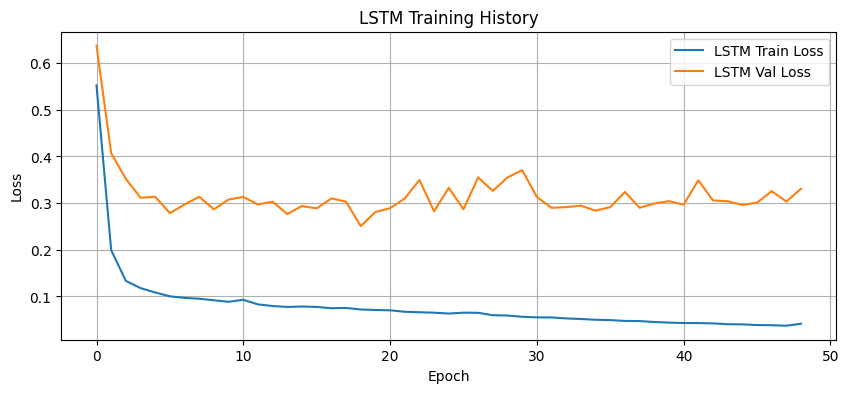

ValueError: X has 1 features, but QuantileTransformer is expecting 24 features as input.

In [ ]:
# ... [Keep imports and initial data loading/splitting cells 58b7e3fd, 365563bc, 42cf2ac2, 8de565d7] ...

# === CELL 3a153ab2 (Modified for LSTM with Lags) ===
# GPU setup
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from sklearn.preprocessing import StandardScaler, QuantileTransformer
import xgboost as xgb # Import XGBoost
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import metrics

print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("CUDA version:", torch.version.cuda)
    print("Device name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is NOT available. Using CPU.")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === 1. Feature Engineering (Lags and Temporal) ===
print("Extracting lag and temporal features...")

def create_all_features(df, target_col='Vehicles', max_lag=168):
    df_feat = df.copy()
    df_feat['DateTime'] = pd.to_datetime(df_feat['DateTime'])

    # --- Lag Features ---
    print(f"Creating lag features up to {max_lag} hours...")
    for lag in range(1, max_lag + 1):
        df_feat[f'lag_{lag}'] = df_feat[target_col].shift(lag)

    # --- Temporal Features ---
    df_feat['hour'] = df_feat['DateTime'].dt.hour
    df_feat['day_of_week'] = df_feat['DateTime'].dt.dayofweek
    df_feat['day'] = df_feat['DateTime'].dt.day
    df_feat['month'] = df_feat['DateTime'].dt.month
    # Cyclical encoding
    df_feat['hour_sin'] = np.sin(2 * np.pi * df_feat['hour']/24)
    df_feat['hour_cos'] = np.cos(2 * np.pi * df_feat['hour']/24)
    df_feat['day_of_week_sin'] = np.sin(2 * np.pi * df_feat['day_of_week']/7)
    df_feat['day_of_week_cos'] = np.cos(2 * np.pi * df_feat['day_of_week']/7)
    df_feat['month_sin'] = np.sin(2 * np.pi * df_feat['month']/12)
    df_feat['month_cos'] = np.cos(2 * np.pi * df_feat['month']/12)
    # Indicators
    df_feat['is_weekend'] = df_feat['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
    df_feat['is_workday'] = (~df_feat['is_weekend']).astype(int)
    df_feat['morning_rush'] = ((df_feat['hour'] >= 7) & (df_feat['hour'] <= 9)).astype(int)
    df_feat['evening_rush'] = ((df_feat['hour'] >= 16) & (df_feat['hour'] <= 19)).astype(int)
    df_feat['is_rush_hour'] = ((df_feat['morning_rush'] | df_feat['evening_rush']) & df_feat['is_workday']).astype(int)

    # Drop rows with NaNs created by lags
    df_feat.dropna(inplace=True)
    return df_feat

# Define feature sets
max_lag = 168
lag_features = [f'lag_{i}' for i in range(1, max_lag + 1)]
temporal_features = [ # Keep these separate for the refinement stage
    'hour_sin', 'hour_cos', 'day_of_week_sin', 'day_of_week_cos',
    'month_sin', 'month_cos', 'is_weekend', 'day',
    'morning_rush', 'evening_rush', 'is_rush_hour', 'is_workday'
]
target_col = 'Vehicles'

# Apply feature engineering to train, val, test
# Important: Apply to the original splits to avoid data leakage across sets
train_data_feat = create_all_features(train_data.copy(), target_col=target_col, max_lag=max_lag)
val_data_feat = create_all_features(val_data.copy(), target_col=target_col, max_lag=max_lag)
test_data_feat = create_all_features(test_data.copy(), target_col=target_col, max_lag=max_lag)

print(f"Shapes after feature engineering & NaN drop:")
print(f"Train: {train_data_feat.shape}, Val: {val_data_feat.shape}, Test: {test_data_feat.shape}")

# === 2. Scaling ===
print("Scaling features...")

# Scale lag features (LSTM input)
lag_scaler = StandardScaler() # StandardScaler often works well for LSTM inputs
X_train_lags = lag_scaler.fit_transform(train_data_feat[lag_features])
X_val_lags = lag_scaler.transform(val_data_feat[lag_features])
X_test_lags = lag_scaler.transform(test_data_feat[lag_features])

# Scale temporal features (Refinement input)
temporal_scaler = StandardScaler()
train_temporal = temporal_scaler.fit_transform(train_data_feat[temporal_features])
val_temporal = temporal_scaler.transform(val_data_feat[temporal_features])
test_temporal = temporal_scaler.transform(test_data_feat[temporal_features])

# Scale target variable (using QuantileTransformer as before)
target_scaler = QuantileTransformer(output_distribution='normal', n_quantiles=min(1000, len(train_data_feat)))
y_train_scaled = target_scaler.fit_transform(train_data_feat[[target_col]]).flatten()
y_val_scaled = target_scaler.transform(val_data_feat[[target_col]]).flatten()
y_test_scaled = target_scaler.transform(test_data_feat[[target_col]]).flatten()

# Keep original targets for final evaluation
y_train_orig = train_data_feat[target_col].values
y_val_orig = val_data_feat[target_col].values
y_test_orig = test_data_feat[target_col].values

# === 3. Prepare Data for LSTM (Lags as sequence) ===
# === 3. Prepare Data for LSTM (Lags as sequence, MULTI-STEP TARGET) ===

def create_multistep_lagged_features_targets(df, lag_features, target_col='Vehicles', forecast_horizon=24):
    """
    For each row, input is previous 168 lags, target is next 24 hours.
    Returns:
        X: (num_samples, 168)
        y: (num_samples, 24)
    """
    X = df[lag_features].values
    y = []
    values = df[target_col].values
    for i in range(len(df) - forecast_horizon + 1):
        y.append(values[i:i+forecast_horizon])
    X = X[:len(y)]  # Align X and y
    return np.array(X), np.array(y)

forecast_horizon = 24

# Create multi-step targets for each split
X_train_lags, y_train_multi = create_multistep_lagged_features_targets(train_data_feat, lag_features, target_col=target_col, forecast_horizon=forecast_horizon)
X_val_lags, y_val_multi = create_multistep_lagged_features_targets(val_data_feat, lag_features, target_col=target_col, forecast_horizon=forecast_horizon)
X_test_lags, y_test_multi = create_multistep_lagged_features_targets(test_data_feat, lag_features, target_col=target_col, forecast_horizon=forecast_horizon)

# Scale lag features (already done above, but now use the new arrays)
X_train_lags_scaled = lag_scaler.fit_transform(X_train_lags)
X_val_lags_scaled = lag_scaler.transform(X_val_lags)
X_test_lags_scaled = lag_scaler.transform(X_test_lags)

# Scale multi-step targets
target_scaler = QuantileTransformer(output_distribution='normal', n_quantiles=min(1000, len(y_train_multi)))
y_train_multi_scaled = target_scaler.fit_transform(y_train_multi)
y_val_multi_scaled = target_scaler.transform(y_val_multi)
y_test_multi_scaled = target_scaler.transform(y_test_multi)

# Reshape for LSTM: (samples, seq_len, features)
X_train_lstm = X_train_lags_scaled.reshape(-1, max_lag, 1)
X_val_lstm = X_val_lags_scaled.reshape(-1, max_lag, 1)
X_test_lstm = X_test_lags_scaled.reshape(-1, max_lag, 1)

# Convert to Tensors
X_train_lstm_tensor = torch.tensor(X_train_lstm, dtype=torch.float32).to(device)
X_val_lstm_tensor = torch.tensor(X_val_lstm, dtype=torch.float32).to(device)
X_test_lstm_tensor = torch.tensor(X_test_lstm, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_multi_scaled, dtype=torch.float32).to(device)  # shape: (N, 24)
y_val_tensor = torch.tensor(y_val_multi_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test_multi_scaled, dtype=torch.float32).to(device)
# Temporal features tensors (will be used in refinement stage)
train_temporal_tensor = torch.tensor(train_temporal, dtype=torch.float32).to(device)
val_temporal_tensor = torch.tensor(val_temporal, dtype=torch.float32).to(device)
test_temporal_tensor = torch.tensor(test_temporal, dtype=torch.float32).to(device)

print(f"LSTM Input Shape (Train): {X_train_lstm_tensor.shape}")
print(f"LSTM Target Shape (Train): {y_train_tensor.shape}")
print(f"Temporal Features Shape (Train): {train_temporal_tensor.shape}")

# === 4. Define LSTM Model (output_dim=24 for multi-step) ===
class LagLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim=24, num_layers=2, dropout=0.3, attention_dim=64):
        super(LagLSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = True
        lstm_output_dim = hidden_dim * 2 if self.bidirectional else hidden_dim

        self.lstm = nn.LSTM(
            input_dim,
            hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=self.bidirectional
        )
        self.attention_fc1 = nn.Linear(lstm_output_dim, attention_dim)
        self.attention_fc2 = nn.Linear(attention_dim, 1)
        self.layer_norm_lstm = nn.LayerNorm(lstm_output_dim)
        self.layer_norm_context = nn.LayerNorm(lstm_output_dim)
        self.fc = nn.Linear(lstm_output_dim, output_dim)  # Output 24 values
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        lstm_out_norm = self.layer_norm_lstm(lstm_out)
        attn_intermed = torch.tanh(self.attention_fc1(lstm_out_norm))
        attn_scores = self.attention_fc2(attn_intermed)
        attn_weights = F.softmax(attn_scores, dim=1)
        context = torch.sum(attn_weights * lstm_out_norm, dim=1)
        context_norm = self.layer_norm_context(context)
        out = self.dropout(context_norm)
        out = self.fc(out)
        return out

# Instantiate LSTM model
lstm_input_dim = 1
lstm_hidden_dim = 256
lstm_output_dim = 24  # <--- CHANGED
lstm_num_layers = 2
lstm_dropout = 0.05
lstm_attention_dim = 64
lstm_model = LagLSTMModel(
    input_dim=lstm_input_dim,
    hidden_dim=lstm_hidden_dim,
    output_dim=lstm_output_dim,
    num_layers=lstm_num_layers,
    dropout=lstm_dropout,
    attention_dim=lstm_attention_dim
).to(device)

print("\nLSTM Model Architecture:")
print(lstm_model)

# === 5. Train LSTM Model ===
print("\n--- Training LSTM Model ---")
lstm_criterion = nn.MSELoss() # Standard MSE for the LSTM stage
lstm_optimizer = torch.optim.AdamW(lstm_model.parameters(), lr=0.001, weight_decay=1e-5)

lstm_train_dataset = TensorDataset(X_train_lstm_tensor, y_train_tensor)
lstm_train_loader = DataLoader(lstm_train_dataset, batch_size=64, shuffle=True)
# --- Validation DataLoader ---
lstm_val_dataset = TensorDataset(X_val_lstm_tensor, y_val_tensor)
# Use a larger batch size for validation if possible, as no gradients are computed
lstm_val_loader = DataLoader(lstm_val_dataset, batch_size=64, shuffle=False)
lstm_epochs = 120 # Adjust as needed
lstm_patience = 30
lstm_patience_counter = 0
best_lstm_val_loss = float('inf')
lstm_train_losses = []
lstm_val_losses = []

for epoch in range(lstm_epochs):
    lstm_model.train()
    epoch_loss = 0
    for batch_X, batch_y in lstm_train_loader:
        lstm_optimizer.zero_grad()
        outputs = lstm_model(batch_X)
        loss = lstm_criterion(outputs, batch_y)
        loss.backward()
        lstm_optimizer.step()
        epoch_loss += loss.item()

    avg_train_loss = epoch_loss / len(lstm_train_loader)
    lstm_train_losses.append(avg_train_loss)

    # Validation
    lstm_model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for batch_X_val, batch_y_val in lstm_val_loader: # Iterate through validation batches
            val_outputs = lstm_model(batch_X_val)
            loss = lstm_criterion(val_outputs, batch_y_val)
            epoch_val_loss += loss.item()

    avg_val_loss = epoch_val_loss / len(lstm_val_loader) # Calculate average validation loss
    lstm_val_losses.append(avg_val_loss)
    # --- End Validation (Batched) ---

    print(f"Epoch {epoch+1}/{lstm_epochs}, LSTM Train Loss: {avg_train_loss:.6f}, LSTM Val Loss: {avg_val_loss:.6f}") # Use avg_val_loss

    # Early stopping (use avg_val_loss)
    if avg_val_loss < best_lstm_val_loss:
        best_lstm_val_loss = avg_val_loss
        torch.save(lstm_model.state_dict(), "best_lag_lstm_24_model.pt")
        lstm_patience_counter = 0
        print(f"  -> New best validation loss: {best_lstm_val_loss:.6f}. Saving model.") # Added print statement
    else:
        lstm_patience_counter += 1
        if lstm_patience_counter >= lstm_patience:
            print(f"Early stopping LSTM training at epoch {epoch+1}")
            break

# Load best LSTM model
import os
if os.path.exists("best_lag_lstm_24_model.pt"):
    lstm_model.load_state_dict(torch.load("best_lag_lstm_24_model.pt"))
    print("Best LSTM model loaded.")
else:
    print("Warning: 'best_lag_lstm_24_model.pt' not found. Using the model from the last epoch.")

# Plot LSTM losses
plt.figure(figsize=(10, 4))
plt.plot(lstm_train_losses, label='LSTM Train Loss')
plt.plot(lstm_val_losses, label='LSTM Val Loss')
plt.title('LSTM Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# === 6. Generate LSTM Predictions (Intermediate Step) ===
def predict_in_batches(model, X_tensor, batch_size=64):
    model.eval()
    device = next(model.parameters()).device
    all_preds_scaled = []
    dataset = TensorDataset(X_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    with torch.no_grad():
        for (batch_X,) in dataloader:
            batch_X = batch_X.to(device)
            outputs = model(batch_X)
            all_preds_scaled.append(outputs.cpu().numpy())
    predictions_scaled = np.concatenate(all_preds_scaled)
    return predictions_scaled  # shape: (N, 24)

# Generate predictions using the batch function
lstm_train_pred_scaled = predict_in_batches(lstm_model, X_train_lstm_tensor)
lstm_val_pred_scaled   = predict_in_batches(lstm_model, X_val_lstm_tensor)
lstm_test_pred_scaled  = predict_in_batches(lstm_model, X_test_lstm_tensor)





LSTM Last 24h RMSE: 13.39
LSTM Last 24h MAE: 11.68


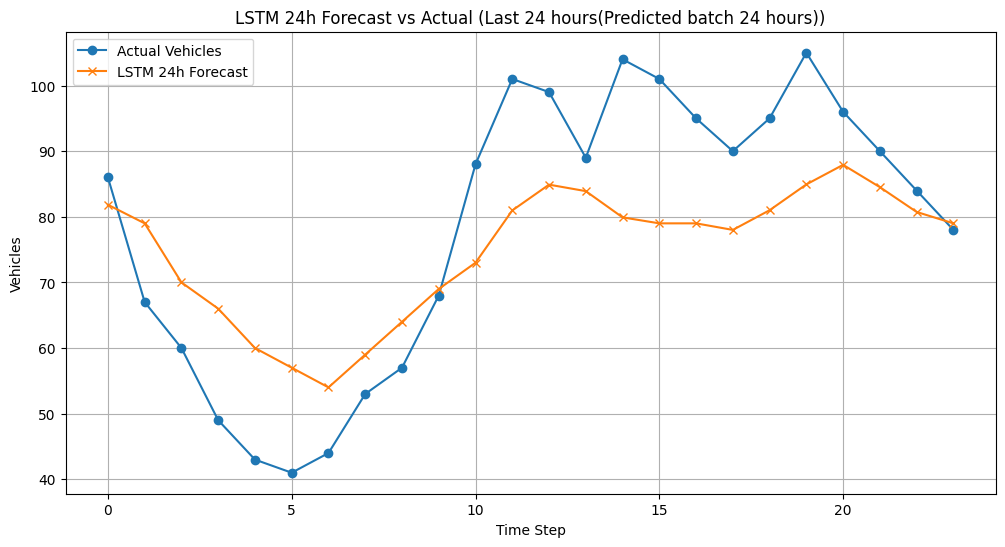

In [11]:
# Use LSTM to predict the last 24 hours of the test set (multi-step output)
lstm_model.eval()
with torch.no_grad():
    last_input = X_test_lstm_tensor[-1].unsqueeze(0)  # shape: (1, 168, 1)
    pred_24h_scaled = lstm_model(last_input).cpu().numpy()  # shape: (1, 24)

# Inverse transform the predictions to get the original scale
pred_24h = target_scaler.inverse_transform(pred_24h_scaled).flatten()
pred_24h = np.clip(pred_24h, 0, None)  # Ensure non-negative predictions

# Get the actual last 24 hours from the original test targets
y_test_orig_24h = y_test_orig[-24:]

# Calculate RMSE and MAE for the last 24 hours
lstm_rmse_24h = np.sqrt(mean_squared_error(y_test_orig_24h, pred_24h))
lstm_mae_24h = mean_absolute_error(y_test_orig_24h, pred_24h)

print(f"LSTM Last 24h RMSE: {lstm_rmse_24h:.2f}")
print(f"LSTM Last 24h MAE: {lstm_mae_24h:.2f}")

# Plot LSTM predictions vs actuals for the last 24 hours of the test set
plt.figure(figsize=(12, 6))
plt.plot(y_test_orig_24h, label='Actual Vehicles', marker='o')
plt.plot(pred_24h, label='LSTM 24h Forecast', marker='x')
plt.title('LSTM 24h Forecast vs Actual (Last 24 hours(Predicted batch 24 hours))')
plt.xlabel('Time Step')
plt.ylabel('Vehicles')
plt.legend()
plt.grid(True)
plt.show()



LSTM Last 24h RMSE: 13.39
LSTM Last 24h MAE: 11.68
LSTM Last 24h R2 Score: 0.59


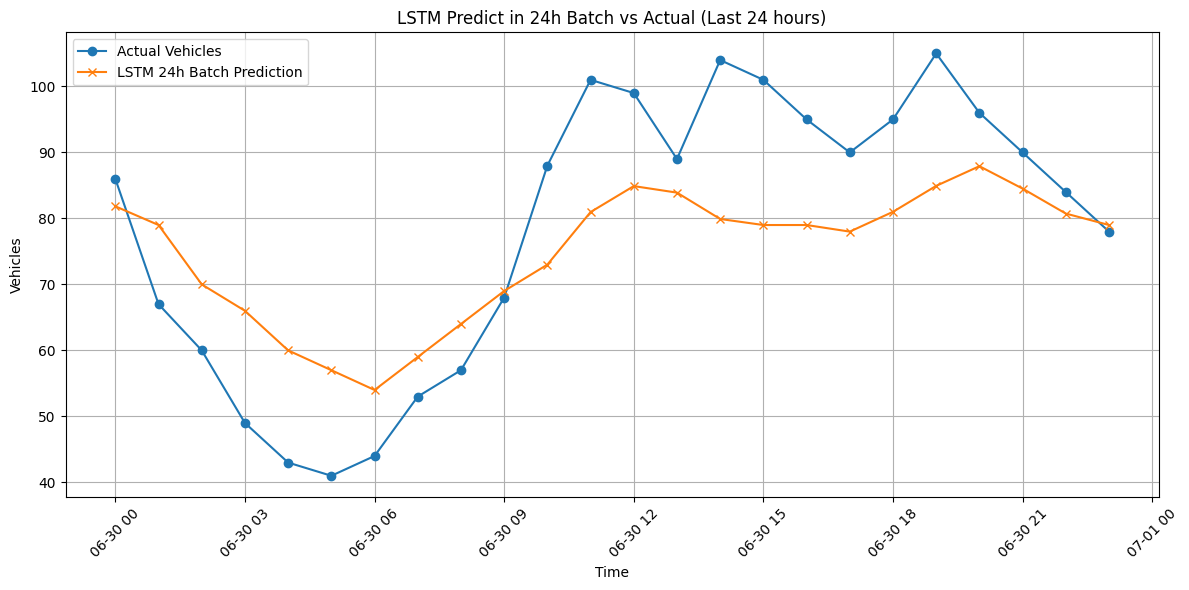

In [16]:
# ...existing code...

# Use LSTM to predict the last 24 hours of the test set (multi-step output)
lstm_model.eval()
with torch.no_grad():
    last_input = X_test_lstm_tensor[-1].unsqueeze(0)  # shape: (1, 168, 1)
    pred_24h_scaled = lstm_model(last_input).cpu().numpy()  # shape: (1, 24)

# Inverse transform the predictions to get the original scale
pred_24h = target_scaler.inverse_transform(pred_24h_scaled)[0]  # shape: (24,)
pred_24h = np.clip(pred_24h, 0, None)  # Ensure non-negative predictions

# Get the actual last 24 hours from the original test targets
y_test_orig_24h = y_test_orig[-24:]

# Create a time index for the last 24 hours (row as time)
time_index = np.arange(1, 25)

# Calculate RMSE and MAE for the last 24 hours
lstm_rmse_24h = np.sqrt(mean_squared_error(y_test_orig_24h, pred_24h))
lstm_mae_24h = mean_absolute_error(y_test_orig_24h, pred_24h)
# r2 score
from sklearn.metrics import r2_score
lstm_r2_24h = r2_score(y_test_orig_24h, pred_24h)
print(f"LSTM Last 24h RMSE: {lstm_rmse_24h:.2f}")
print(f"LSTM Last 24h MAE: {lstm_mae_24h:.2f}")
print(f"LSTM Last 24h R2 Score: {lstm_r2_24h:.2f}")

# Get the actual last 24 hours' DateTime from the test set
last_24_datetimes = test_data_feat['DateTime'].iloc[-24:]

# Plot LSTM predictions vs actuals for the last 24 hours of the test set
plt.figure(figsize=(12, 6))
plt.plot(last_24_datetimes, y_test_orig_24h, label='Actual Vehicles', marker='o')
plt.plot(last_24_datetimes, pred_24h, label='LSTM 24h Batch Prediction', marker='x')
plt.title('LSTM Predict in 24h Batch vs Actual (Last 24 hours)')
plt.xlabel('Time')
plt.ylabel('Vehicles')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Calculate RMSE, MAE, and R2 for LSTM predictions on the full test set (multi-step)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Inverse transform predictions and true targets for all windows
lstm_test_pred_orig = target_scaler.inverse_transform(lstm_test_pred_scaled)
y_test_multi_orig = target_scaler.inverse_transform(y_test_multi_scaled)

# Flatten both arrays for global metrics
lstm_test_pred_flat = np.clip(lstm_test_pred_orig.flatten(), 0, None)
y_test_flat = np.clip(y_test_multi_orig.flatten(), 0, None)

min_len = min(len(lstm_test_pred_flat), len(y_test_flat))
if len(lstm_test_pred_flat) != len(y_test_flat):
    print(f"Warning: Mismatch in prediction ({len(lstm_test_pred_flat)}) and target ({len(y_test_flat)}) lengths. Trimming to {min_len}.")
lstm_test_pred_flat = lstm_test_pred_flat[:min_len]
y_test_flat = y_test_flat[:min_len]

lstm_rmse_full = np.sqrt(mean_squared_error(y_test_flat, lstm_test_pred_flat))
lstm_mae_full = mean_absolute_error(y_test_flat, lstm_test_pred_flat)
lstm_r2_full = r2_score(y_test_flat, lstm_test_pred_flat)

print(f"\nLSTM Test RMSE (full set): {lstm_rmse_full:.2f}")
print(f"LSTM Test MAE (full set): {lstm_mae_full:.2f}")
print(f"LSTM Test R2 Score (full set): {lstm_r2_full:.2f}")


LSTM Test RMSE (full set): 12.22
LSTM Test MAE (full set): 9.09
LSTM Test R2 Score (full set): 0.74
